## Churn Prediction

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("churn_prediction.csv")
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [ ]:
df.shape

(28382, 21)

In [ ]:
df["churn"].value_counts()

,count
churn,
0,23122
1,5260


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
df['dependents'] = df['dependents'].fillna(0.0)

In [ ]:
df["city"]=df["city"].fillna(1020.0)

In [ ]:
df["gender"]=df["gender"].fillna("Female")

In [ ]:
df["occupation"]=df["occupation"].fillna("self_employed")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  object 
 4   dependents                      28382 non-null  float64
 5   occupation                      28382 non-null  object 
 6   city                            28382 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
df["last_transaction"]=pd.to_datetime(df["last_transaction"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_id                     28382 non-null  int64         
 1   vintage                         28382 non-null  int64         
 2   age                             28382 non-null  int64         
 3   gender                          28382 non-null  object        
 4   dependents                      28382 non-null  float64       
 5   occupation                      28382 non-null  object        
 6   city                            28382 non-null  float64       
 7   customer_nw_category            28382 non-null  int64         
 8   branch_code                     28382 non-null  int64         
 9   current_balance                 28382 non-null  float64       
 10  previous_month_end_balance      28382 non-null  float64       
 11  av

In [ ]:
# Convert categorical variable

dict_gender = {'Male': 1, 'Female':0}

df.replace({'gender': dict_gender}, inplace = True)

<ipython-input-13-90cfba1402b2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender': dict_gender}, inplace = True)


In [ ]:
# 'self_employed': 1, 'salaried':2, 'company':3,'student':4,'retired':5

dict_occupation = {'self_employed': 1, 'salaried':2, 'company':3,'student':4,'retired':5}

df.replace({'occupation': dict_occupation}, inplace = True)


<ipython-input-14-15b04b95e7e8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'occupation': dict_occupation}, inplace = True)


In [ ]:
#one_hot_encoding
# Convert occupation to one hot encoded features

#df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_id                     28382 non-null  int64         
 1   vintage                         28382 non-null  int64         
 2   age                             28382 non-null  int64         
 3   gender                          28382 non-null  int64         
 4   dependents                      28382 non-null  float64       
 5   occupation                      28382 non-null  int64         
 6   city                            28382 non-null  float64       
 7   customer_nw_category            28382 non-null  int64         
 8   branch_code                     28382 non-null  int64         
 9   current_balance                 28382 non-null  float64       
 10  previous_month_end_balance      28382 non-null  float64       
 11  av

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,1,0.0,1,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,1,0.0,1,1020.0,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,1,0.0,2,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,0,0.0,1,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,1,2.0,1,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [ ]:
df=df.drop(columns=["customer_id","last_transaction"])

In [ ]:
x = df.drop(columns="churn")
x


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,2101,66,1,0.0,1,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,2348,35,1,0.0,1,1020.0,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61
2,2194,31,1,0.0,2,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14
3,2329,90,0,0.0,1,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79
4,1579,42,1,2.0,1,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,0,0.0,4,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43
28378,1537,34,0,0.0,1,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32
28379,2376,47,1,0.0,2,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24
28380,1745,50,1,3.0,1,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55


In [ ]:
y=df["churn"]
y

,churn
0,0
1,0
2,0
3,1
4,1
...,...
28377,0
28378,0
28379,1
28380,0


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test

x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

Scaler_X = StandardScaler()

X_train = Scaler_X.fit_transform(x_train)

X_test = Scaler_X.transform(x_test)

## Handling Imbalance: SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE

from collections import Counter

counter = Counter(y_train)

print('Before',counter)

# oversampling the train dataset using SMOTE

smt = SMOTE()

#X_train, y_train = smt.fit_resample(X_train, y_train)

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)

print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18497, 1: 18497})


## Handling Imbalance: ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)

print('Before',counter)

# oversampling the train dataset using ADASYN

ada = ADASYN(random_state=130)

X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)

print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18497, 1: 18107})


## Building the model and Evaluation

In [ ]:
## DT for imbalanced data

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

tree_score=tree_model.score(X_test,y_test)

print(tree_score)

yp=tree_model.predict(X_test)

cm=confusion_matrix(y_test,yp)

print(cm)

0.7891491985203453
[[3996  629]
 [ 568  484]]


In [ ]:
## DT for imbalanced data

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

from sklearn.tree import DecisionTreeClassifier

tree_model1 = DecisionTreeClassifier()

tree_model1.fit(X_train_sm,y_train_sm)

tree_score=tree_model1.score(X_test,y_test)

print(tree_score)

yp=tree_model1.predict(X_test)

cm=confusion_matrix(y_test,yp)

print(cm)

0.7165756561564206
[[3442 1183]
 [ 426  626]]


In [ ]:
#DT - ADASYN

tree_model3 = DecisionTreeClassifier()

tree_model3.fit(X_train_ada, y_train_ada)

yp=tree_model3.predict(X_test)

cm=confusion_matrix(y_test,yp)

print(cm)

tree_score=tree_model3.score(X_test,y_test)

print(tree_score)


[[3434 1191]
 [ 435  617]]
0.7135811167870354


## Randomized Search CV(Search for the best parameters of the DT classifier)

In [ ]:
# Maximum number of depth in each tree:

max_depth = [i for i in range(5,16,2)]

# Minimum number of samples to consider to split a node:

min_samples_split = [2, 5, 10, 15, 20, 50, 100]

# Minimum number of samples to consider at each leaf node:

min_samples_leaf = [1, 2, 5]

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

tree_modelS = DecisionTreeClassifier()

tree_param_grid = {

    'max_depth': max_depth,

    'min_samples_split': min_samples_split,

    'min_samples_leaf': min_samples_leaf

}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

clf_DT = RandomizedSearchCV(tree_modelS, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)

clf_DT.fit(X_train, y_train)

clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=100)

In [ ]:
tree1=DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=100)


tree1.fit(X_train,y_train)

yp=tree1.predict(X_test)

cm=confusion_matrix(y_test,yp)

print(cm)

tree_score=tree1.score(X_test,y_test)

print(tree_score)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

precision=precision_score(y_test,yp)

recall=recall_score(y_test,yp)

F1score=f1_score(y_test,yp)

print(precision, recall, F1score)


[[4380  245]
 [ 586  466]]
0.8536198696494628
0.6554149085794655 0.4429657794676806 0.5286443562110039


In [ ]:
tree2=DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=100)


tree2.fit(X_train_sm,y_train_sm)

yp=tree2.predict(X_test)

cm=confusion_matrix(y_test,yp)

print(cm)

tree_score=tree2.score(X_test,y_test)

print(tree_score)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

precision=precision_score(y_test,yp)

recall=recall_score(y_test,yp)

F1score=f1_score(y_test,yp)

print(precision, recall, F1score)


[[3703  922]
 [ 379  673]]
0.7708296635546944
0.4219435736677116 0.6397338403041825 0.5085001888930865


In [ ]:
tree3=DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=100)


tree3.fit(X_train_ada,y_train_ada)

yp=tree3.predict(X_test)

cm=confusion_matrix(y_test,yp)

print(cm)

tree_score=tree3.score(X_test,y_test)

print(tree_score)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

precision=precision_score(y_test,yp)

recall=recall_score(y_test,yp)

F1score=f1_score(y_test,yp)

print(precision, recall, F1score)


[[3573 1052]
 [ 368  684]]
0.7498678879689977
0.39400921658986177 0.6501901140684411 0.49067431850789095


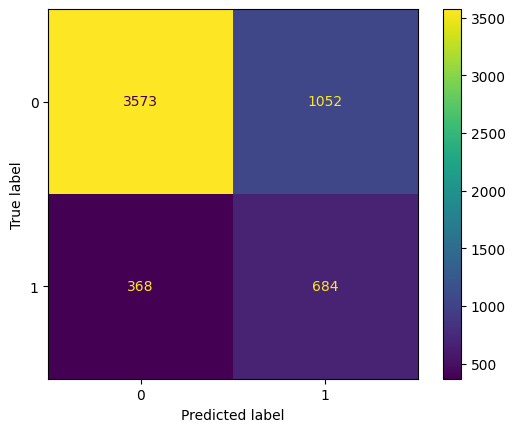

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

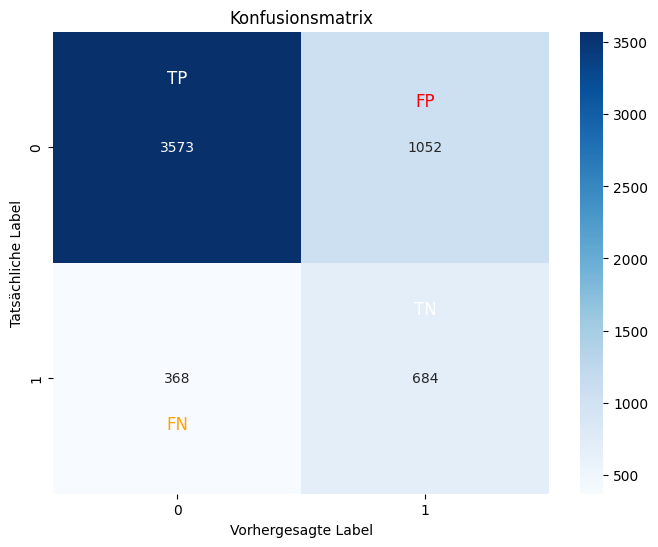

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import confusion_matrix

# Berechnen der Konfusionsmatrix

conf_matrix = confusion_matrix(y_test, yp)

# Plotten der Konfusionsmatrix mit Hervorhebung

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Vorhergesagte Label')

plt.ylabel('Tatsächliche Label')

plt.title('Konfusionsmatrix')

# Hervorhebung der TP, TN, FP und FN

for i in range(len(conf_matrix)):

    for j in range(len(conf_matrix[i])):

        if i == j:

            plt.text(j + 0.5, i + 0.2, 'TP' if i == 0 else 'TN', fontsize=12, color='white', ha='center', va='center')

        else:

            plt.text(j + 0.5, i + (0.3 if i < j else 0.7), 'FP' if i < j else 'FN', fontsize=12, color='red' if i < j else 'orange', ha='center', va='center')

plt.show()

In [ ]:
X_train=pd.DataFrame(X_train)


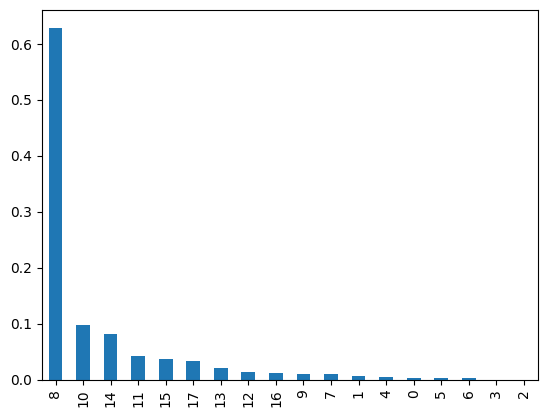

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data

feature_importances = pd.Series(tree1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart

feature_importances.plot.bar();


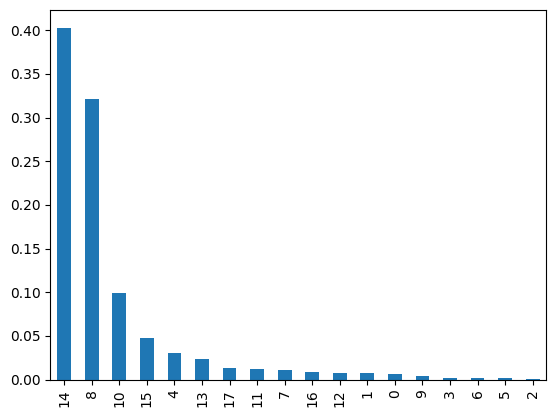

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data

feature_importances = pd.Series(tree2.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart

feature_importances.plot.bar();


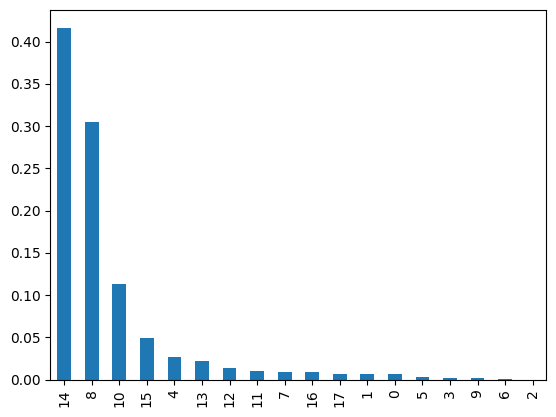

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data

feature_importances = pd.Series(tree3.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart

feature_importances.plot.bar();


## Projekt

In [ ]:
df1=pd.read_csv("Tesla.csv")
df1

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [ ]:
df1["Date"]=pd.to_datetime(df1["Date"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [ ]:
df.duplicated().sum()

0

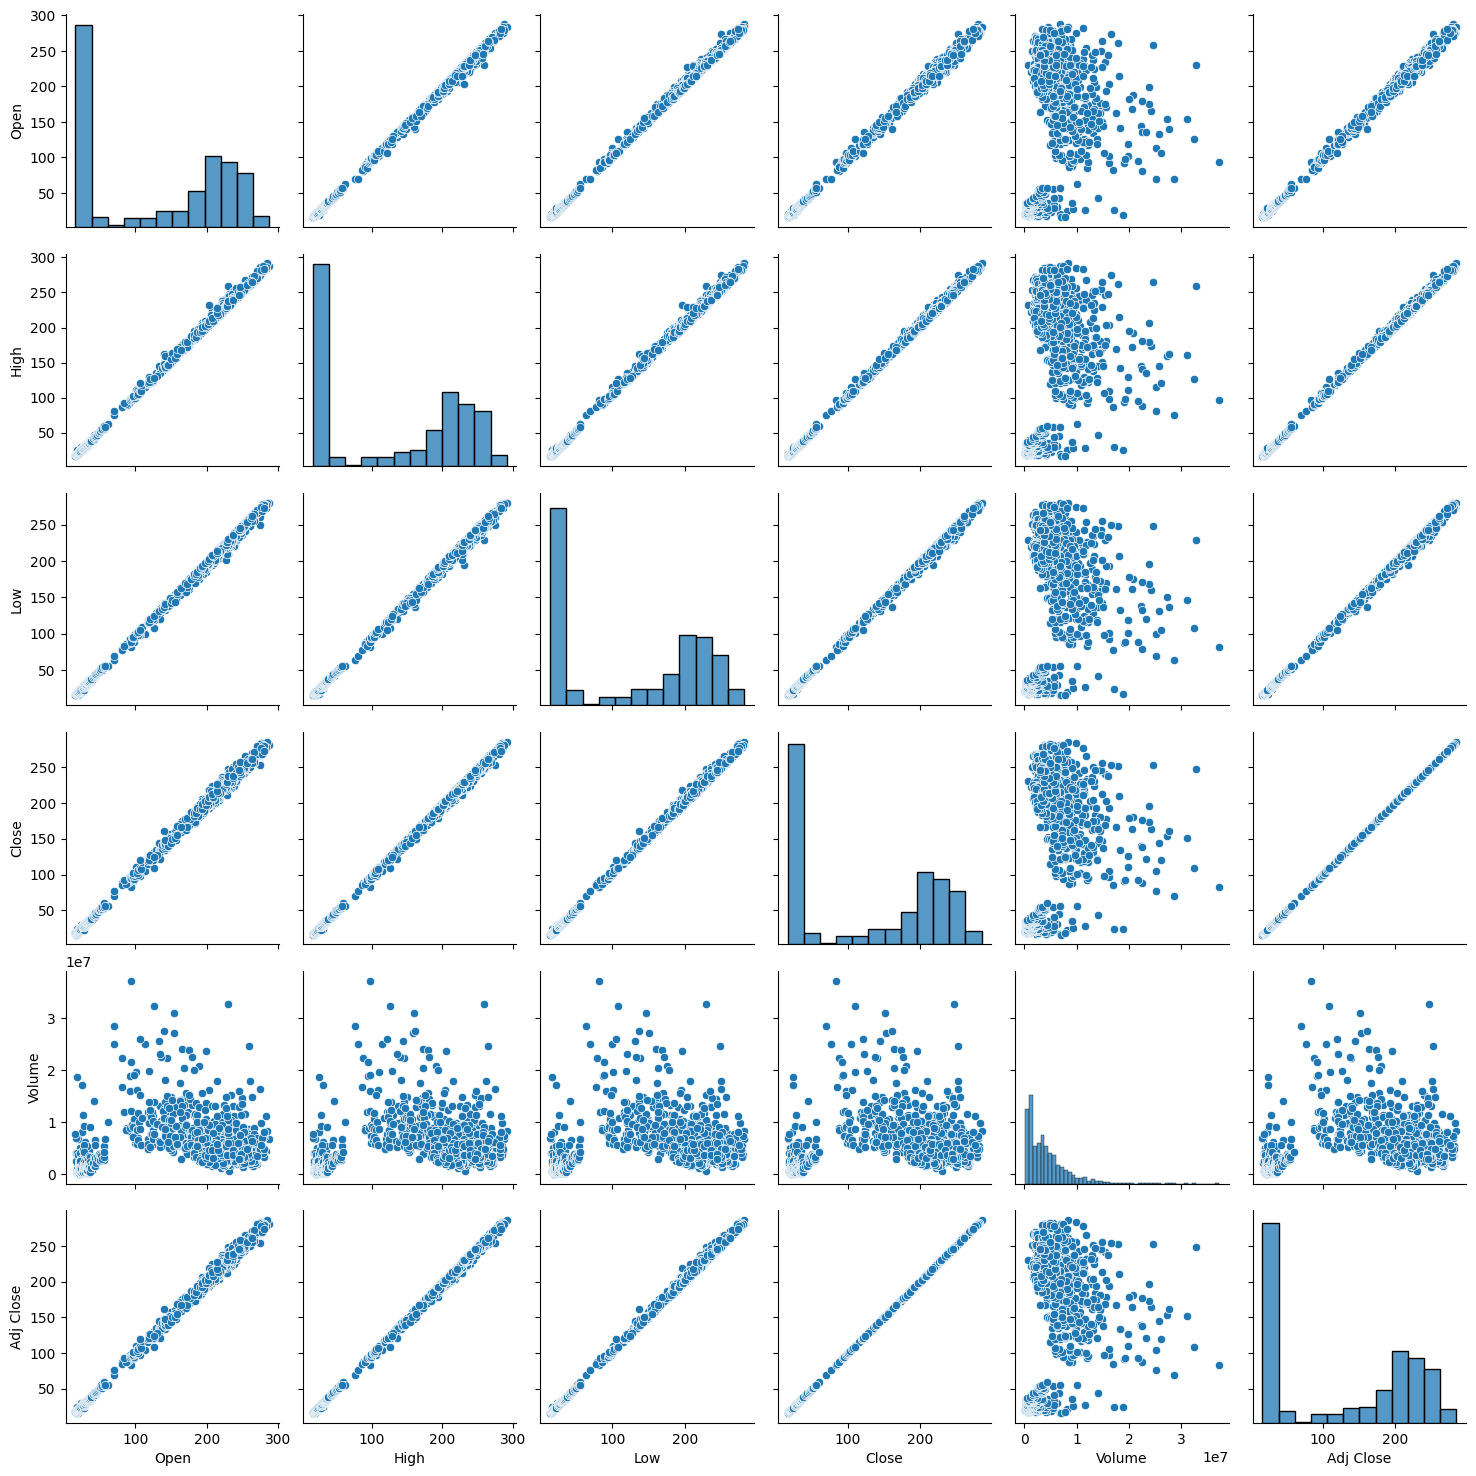

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df1)